In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))



<img src="profile_manoelgadi.png" width=100 height=100 align="right">

Author: Prof. Manoel Gadi

Contact: mfalonso@faculty.ie.edu

To compete in this challenge, please create an user at my teaching website: http://mfalonso.pythonanywhere.com

Last revision: 09/March/2020

Please right your __full__ name below

In [2]:
#Eugen Wettstein

---

## Fraud detection game starting code...


### Importing libraries and datasets

In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Development sample

In [4]:
print ("LOADING DATASETS...")
df = pd.read_csv("dev.csv") 

LOADING DATASETS...


In [5]:
df.head()

id  ib_var_1  ib_var_2  ib_var_3  ib_var_4  ib_var_5  ib_var_6  ib_var_7  \
0   1         0         1         0         0         1         1         0   
1   2         0         1         0         0         0         1         0   
2   3         0         0         0         0         1         1         0   
3   4         0         1         0         1         1         1         0   
4   5         0         0         0         0         0         1         0   

   ib_var_8  ib_var_9  ...  if_var_73  if_var_74  if_var_75  if_var_76  \
0         0         0  ...      0.800          0          6          5   
1         0         0  ...      0.925          5          8          5   
2         0         0  ...      0.800          3         10          6   
3         0         0  ...      0.825          5          5          6   
4         0         0  ...      0.800          0         11          5   

   if_var_77  if_var_78  if_var_79  if_var_80  if_var_81  ob_target  
0   0.500000     9.4634     5140.0   0.766667          1          0  
1   0.400000     7.6341     2570.0   0.700000          4          0  
2   0.700000    11.1707     5140.0   0.666667          2          0  
3   0.433333     8.0488     1028.0   0.766667          3          0  
4   0.700000     5.5854     5140.0   0.733333          3          0  

[5 rows x 83 columns]

In [6]:
df.shape

(864, 83)

### Out-of-time sample

In [7]:
dfo = pd.read_csv("oot0.csv")

In [8]:
dfo.head()

id  ib_var_1  ib_var_2  ib_var_3  ib_var_4  ib_var_5  ib_var_6  ib_var_7  \
0   1         0         1         0         0         1         0         0   
1   2         1         0         0         0         1         1         0   
2   3         0         0         0         0         1         1         0   
3   4         0         1         0         1         1         1         0   
4   5         1         0         0         1         1         1         0   

   ib_var_8  ib_var_9  ...  if_var_72  if_var_73  if_var_74  if_var_75  \
0         0         0  ...          5      0.775        1.0       10.0   
1         0         0  ...          6      0.750        0.0        8.0   
2         0         0  ...          7      0.725        0.0        8.0   
3         0         0  ...          4      0.925        2.0        7.0   
4         0         0  ...          5      0.925        0.0       10.0   

   if_var_76  if_var_77  if_var_78    if_var_79  if_var_80  if_var_81  
0       11.0   0.666667        NaN  5140.000000   0.666667          3  
1       10.0   0.600000    12.9024  5140.000000   0.733333          0  
2        6.0   0.700000        NaN  2570.000000   0.766667          1  
3        5.0   0.566667    15.5366  2056.000000   0.833333          0  
4        7.0   0.333333    17.8293  4728.799805   0.633333          2  

[5 rows x 82 columns]

In [9]:
dfo.shape

(2967, 82)

## Identifying the types of the variables:

* id is a primary key auto incremental
*  ib_var_1 is input binary - flag 0/1 variable
*  ib_var_2 is input binary - flag 0/1 variable
*  ib_var_3 is input binary - flag 0/1 variable
*  ib_var_4 is input binary - flag 0/1 variable
*  ib_var_5 is input binary - flag 0/1 variable
*  ib_var_6 is input binary - flag 0/1 variable
*  ib_var_7 is input binary - flag 0/1 variable
*  ib_var_8 is input binary - flag 0/1 variable
*  ib_var_9 is input binary - flag 0/1 variable
*  ib_var_10 is input binary - flag 0/1 variable
*  ib_var_11 is input binary - flag 0/1 variable
*  ib_var_12 is input binary - flag 0/1 variable
*  ib_var_13 is input binary - flag 0/1 variable
*  ib_var_14 is input binary - flag 0/1 variable
*  ib_var_15 is input binary - flag 0/1 variable
*  ib_var_16 is input binary - flag 0/1 variable
*  ib_var_17 is input binary - flag 0/1 variable
*  ib_var_18 is input binary - flag 0/1 variable
*  ib_var_19 is input binary - flag 0/1 variable
*  ib_var_20 is input binary - flag 0/1 variable
*  ib_var_21 is input binary - flag 0/1 variable
*  icn_var_22 is input categorical nominal
*  icn_var_23 is input categorical nominal
*  icn_var_24 is input categorical nominal
*  ico_var_25 is input categorical ordinal
*  ico_var_26 is input categorical ordinal
*  ico_var_27 is input categorical ordinal
*  ico_var_28 is input categorical ordinal
*  ico_var_29 is input categorical ordinal
*  ico_var_30 is input categorical ordinal
*  ico_var_31 is input categorical ordinal
*  ico_var_32 is input categorical ordinal
*  ico_var_33 is input categorical ordinal
*  ico_var_34 is input categorical ordinal
*  ico_var_35 is input categorical ordinal
*  ico_var_36 is input categorical ordinal
*  ico_var_37 is input categorical ordinal
*  ico_var_38 is input categorical ordinal
*  ico_var_39 is input categorical ordinal
*  ico_var_40 is input categorical ordinal
*  ico_var_41 is input categorical ordinal
*  ico_var_42 is input categorical ordinal
*  ico_var_43 is input categorical ordinal
*  ico_var_44 is input categorical ordinal
*  ico_var_45 is input categorical ordinal
*  ico_var_46 is input categorical ordinal
*  ico_var_47 is input categorical ordinal
*  ico_var_48 is input categorical ordinal
*  ico_var_49 is input categorical ordinal
*  ico_var_50 is input categorical ordinal
*  ico_var_51 is input categorical ordinal
*  ico_var_52 is input categorical ordinal
*  ico_var_53 is input categorical ordinal
*  ico_var_54 is input categorical ordinal
*  ico_var_55 is input categorical ordinal
*  ico_var_56 is input categorical ordinal
*  ico_var_57 is input categorical ordinal
*  ico_var_58 is input categorical ordinal
*  ico_var_59 is input categorical ordinal
*  ico_var_60 is input categorical ordinal
*  ico_var_61 is input categorical ordinal
*  ico_var_62 is input categorical ordinal
*  ico_var_63 is input categorical ordinal
*  ico_var_64 is input categorical ordinal
*  if_var_65 is input numerical continuos (input float)
*  if_var_66 is input numerical continuos (input float)
*  if_var_67 is input numerical continuos (input float)
*  if_var_68 is input numerical continuos (input float)
*  if_var_69 is input numerical continuos (input float)
*  if_var_70 is input numerical continuos (input float)
*  if_var_71 is input numerical continuos (input float)
*  if_var_72 is input numerical continuos (input float)
*  if_var_73 is input numerical continuos (input float)
*  if_var_74 is input numerical continuos (input float)
*  if_var_75 is input numerical continuos (input float)
*  if_var_76 is input numerical continuos (input float)
*  if_var_77 is input numerical continuos (input float)
*  if_var_78 is input numerical continuos (input float)
*  if_var_79 is input numerical continuos (input float)
*  if_var_80 is input numerical continuos (input float)
*  if_var_81 is input numerical continuos (input float)
*  ob_target is output binary (target variable: 1 meaning fraud case and 0 non-fraud case)

## <u>EDA</u>

### <u>Replacing of Null values</u>

In [10]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
df[df.columns[63:82]] = imp_mean.fit_transform(df[df.columns[63:82]])

In [11]:
df.isnull().sum().sum()

0

In [12]:
from collections import Counter
def my_mode(sample):
    c = Counter(sample)
    get_mode = dict(c) 
    return [k for k, v in get_mode.items() if v == max(list(c.values()))] 

In [13]:
print ("STEP 1: DOING MY TRANSFORMATIONS...")
for i in range(1,df.shape[1]-1):
    if dfo.loc[:,dfo.columns[i]].isnull().sum() > 0:
        if i <= 65:
            dfo.loc[:,dfo.columns[i]][dfo.loc[:,dfo.columns[i]].isnull()] = my_mode(df.loc[:,df.columns[i]]) # Replacing NaN with the mode of the trained data
        else:
            dfo.loc[:,dfo.columns[i]][dfo.loc[:,dfo.columns[i]].isnull()] = df.loc[:,df.columns[i]].median() # Replacing NaN with the mean of the trained data
    else:
        next

STEP 1: DOING MY TRANSFORMATIONS...


/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [14]:
# Checking for nulls in dfo
df.isnull().sum().sum()

0

### <u>Scale of the data</u>

In [15]:
# Scaling of the data in a [0,1] range
#scaler = RobustScaler(with_centering=False)
#df.loc[:,df.columns[65:82]] = scaler.fit_transform(df.loc[:,df.columns[65:82]])
#dfo.loc[:,dfo.columns[65:82]] = scaler.fit_transform(dfo.loc[:,dfo.columns[65:82]])

### <u>Transormation of data type</u>

In [16]:
# Before
df[df.columns[1:22]].dtypes

ib_var_1     int64
ib_var_2     int64
ib_var_3     int64
ib_var_4     int64
ib_var_5     int64
ib_var_6     int64
ib_var_7     int64
ib_var_8     int64
ib_var_9     int64
ib_var_10    int64
ib_var_11    int64
ib_var_12    int64
ib_var_13    int64
ib_var_14    int64
ib_var_15    int64
ib_var_16    int64
ib_var_17    int64
ib_var_18    int64
ib_var_19    int64
ib_var_20    int64
ib_var_21    int64
dtype: object

In [17]:
# Boolian columns 1-22
df[df.columns[1:22]] = df[df.columns[1:22]]
dfo[dfo.columns[1:22]] = dfo[dfo.columns[1:22]]

In [18]:
# After
df[df.columns[1:22]].dtypes

ib_var_1     int64
ib_var_2     int64
ib_var_3     int64
ib_var_4     int64
ib_var_5     int64
ib_var_6     int64
ib_var_7     int64
ib_var_8     int64
ib_var_9     int64
ib_var_10    int64
ib_var_11    int64
ib_var_12    int64
ib_var_13    int64
ib_var_14    int64
ib_var_15    int64
ib_var_16    int64
ib_var_17    int64
ib_var_18    int64
ib_var_19    int64
ib_var_20    int64
ib_var_21    int64
dtype: object

In [19]:
import numpy as np
# Setting an order of the categories
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [20]:
# Before
df[df.columns[22:65]].dtypes

icn_var_22      int64
icn_var_23      int64
icn_var_24      int64
ico_var_25      int64
ico_var_26      int64
ico_var_27      int64
ico_var_28      int64
ico_var_29      int64
ico_var_30      int64
ico_var_31      int64
ico_var_32      int64
ico_var_33      int64
ico_var_34      int64
ico_var_35      int64
ico_var_36      int64
ico_var_37      int64
ico_var_38      int64
ico_var_39      int64
ico_var_40      int64
ico_var_41      int64
ico_var_42      int64
ico_var_43      int64
ico_var_44      int64
ico_var_45      int64
ico_var_46      int64
ico_var_47      int64
ico_var_48      int64
ico_var_49      int64
ico_var_50      int64
ico_var_51      int64
ico_var_52      int64
ico_var_53      int64
ico_var_54      int64
ico_var_55      int64
ico_var_56      int64
ico_var_57      int64
ico_var_58      int64
ico_var_59      int64
ico_var_60      int64
ico_var_61      int64
ico_var_62      int64
ico_var_63    float64
ico_var_64    float64
dtype: object

In [21]:
# Categorical nominal columns 22-24
df[df.columns[22:25]] = df[df.columns[22:25]].astype('category')
dfo[dfo.columns[22:25]] = dfo[dfo.columns[22:25]].astype('int').astype('category')
# Categorical ordinal columns 25-64
for i in range(25,65):
    if i < 33 or i > 36:
        #For df
        cat_sorted_df = selection_sort(df[df.columns[i]].unique())
        cat_df = [*range(int(min(cat_sorted_df)),int(max(cat_sorted_df)+1))]
        cat_dtype_df = pd.api.types.CategoricalDtype(categories=cat_df, ordered=True)
        df[df.columns[i]] = df[df.columns[i]].astype(cat_dtype_df)
        #For dfo
        #cat_sorted_dfo = selection_sort(dfo[dfo.columns[i]].unique())
        cat_dtype_dfo = pd.api.types.CategoricalDtype(categories=cat_df, ordered=True)
        dfo[dfo.columns[i]] = dfo[dfo.columns[i]].astype(cat_dtype_dfo)
    else:
        #For df
        df[df.columns[i]] = pd.cut(df[df.columns[i]], 5, labels=[1,2,3,4,5])
        #For dfo
        dfo[dfo.columns[i]] = pd.cut(dfo[dfo.columns[i]], 5, labels=[1,2,3,4,5])

In [22]:
df.isnull().sum().sum()

0

In [23]:
# After
df[df.columns[22:65]].dtypes

icn_var_22    category
icn_var_23    category
icn_var_24    category
ico_var_25    category
ico_var_26    category
ico_var_27    category
ico_var_28    category
ico_var_29    category
ico_var_30    category
ico_var_31    category
ico_var_32    category
ico_var_33    category
ico_var_34    category
ico_var_35    category
ico_var_36    category
ico_var_37    category
ico_var_38    category
ico_var_39    category
ico_var_40    category
ico_var_41    category
ico_var_42    category
ico_var_43    category
ico_var_44    category
ico_var_45    category
ico_var_46    category
ico_var_47    category
ico_var_48    category
ico_var_49    category
ico_var_50    category
ico_var_51    category
ico_var_52    category
ico_var_53    category
ico_var_54    category
ico_var_55    category
ico_var_56    category
ico_var_57    category
ico_var_58    category
ico_var_59    category
ico_var_60    category
ico_var_61    category
ico_var_62    category
ico_var_63    category
ico_var_64    category
dtype: obje

In [24]:
df[df.columns[65:82]].dtypes

if_var_65    float64
if_var_66    float64
if_var_67    float64
if_var_68    float64
if_var_69    float64
if_var_70    float64
if_var_71    float64
if_var_72    float64
if_var_73    float64
if_var_74    float64
if_var_75    float64
if_var_76    float64
if_var_77    float64
if_var_78    float64
if_var_79    float64
if_var_80    float64
if_var_81    float64
dtype: object

In [25]:
# Processing of features 65-81
from sklearn.preprocessing import MinMaxScaler
import numpy as np
bins_nor = [-0.0000000001,0.2, 0.4, 0.6, 0.8, 1.0000001]
bins_77 = [-0.0000000001,0.2,0.9,1.0000001]
bins_80 = [-0.0000000001,0.5,0.97,1.0000001]

#cats_1 = pd.api.types.CategoricalDtype(categories=[0,1,2,3,4], ordered=True)
#cats_2 = pd.api.types.CategoricalDtype(categories=[0,1,2], ordered=True)

for i in range(65,82):
    if min(df[df.columns[i]]) < 0 or max(df[df.columns[i]]) > 1:
        # Scaling of the data in a [0,1] range
        scaler = MinMaxScaler()
        # For df
        df[df.columns[i]] = scaler.fit_transform(df[df.columns[i]].values.reshape(-1, 1))
        df[df.columns[i]] = pd.cut(df[df.columns[i]], bins_nor, labels=[0,1,2,3,4])
        # For dfo
        dfo[dfo.columns[i]] = scaler.fit_transform(dfo[dfo.columns[i]].values.reshape(-1, 1))
        dfo[dfo.columns[i]] = pd.cut(dfo[dfo.columns[i]], bins_nor, labels=[0,1,2,3,4])
        
    elif min(df[df.columns[i]]) >= 0 and max(df[df.columns[i]]) <= 1 and i == 73:
        # For df
        df[df.columns[i]] = pd.cut(df[df.columns[i]], bins_nor, labels=[0,1,2,3,4])
        # For dfo
        dfo[dfo.columns[i]] = pd.cut(dfo[dfo.columns[i]], bins_nor, labels=[0,1,2,3,4])
        
    elif min(df[df.columns[i]]) >= 0 and max(df[df.columns[i]]) <= 1 and i == 77:
        # For df
        df[df.columns[i]] = pd.cut(df[df.columns[i]], bins_77, labels=[0,1,2])
        # For dfo
        dfo[dfo.columns[i]] = pd.cut(dfo[dfo.columns[i]], bins_77, labels=[0,1,2])
        
    else:
        # For df
        df[df.columns[i]] = pd.cut(df[df.columns[i]], bins_80, labels=[0,1,2])
        # For dfo
        dfo[dfo.columns[i]] = pd.cut(dfo[dfo.columns[i]], bins_80, labels=[0,1,2])
        
#df[df.columns[65:82]] = df[df.columns[65:82]].astype('int').astype('category')
#dfo[dfo.columns[65:82]] = dfo[dfo.columns[65:82]].astype('int').astype('category')

In [26]:
print(df[df.columns[65:82]].isnull().sum())
print()
print(dfo[df.columns[65:82]].isnull().sum())

if_var_65    0
if_var_66    0
if_var_67    0
if_var_68    0
if_var_69    0
if_var_70    0
if_var_71    0
if_var_72    0
if_var_73    0
if_var_74    0
if_var_75    0
if_var_76    0
if_var_77    0
if_var_78    0
if_var_79    0
if_var_80    0
if_var_81    0
dtype: int64

if_var_65    0
if_var_66    0
if_var_67    0
if_var_68    0
if_var_69    0
if_var_70    0
if_var_71    0
if_var_72    0
if_var_73    0
if_var_74    0
if_var_75    0
if_var_76    0
if_var_77    0
if_var_78    0
if_var_79    0
if_var_80    0
if_var_81    0
dtype: int64


In [27]:
df[df.columns[65:82]]

if_var_65 if_var_66 if_var_67 if_var_68 if_var_69 if_var_70 if_var_71  \
0           1         4         0         2         1         0         1   
1           1         4         0         0         0         0         0   
2           3         4         1         0         1         0         1   
3           1         4         1         2         0         0         1   
4           1         4         1         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
859         1         4         0         0         0         0         1   
860         2         4         1         2         0         0         1   
861         2         4         2         3         1         0         0   
862         3         4         0         0         0         0         1   
863         1         4         0         0         3         0         0   

    if_var_72 if_var_73 if_var_74 if_var_75 if_var_76 if_var_77 if_var_78  \
0           1         3         0         1         1         1         1   
1           0         4         2         1         1         1         0   
2           0         3         1         2         1         1         1   
3           1         4         2         1         1         1         0   
4           0         3         0         2         1         1         0   
..        ...       ...       ...       ...       ...       ...       ...   
859         1         2         0         0         1         1         0   
860         1         3         1         2         1         1         2   
861         1         3         0         1         1         1         2   
862         0         3         0         2         2         1         0   
863         1         3         0         2         2         1         0   

    if_var_79 if_var_80 if_var_81  
0           1         1         0  
1           0         1         3  
2           1         1         1  
3           0         1         3  
4           1         1         3  
..        ...       ...       ...  
859         0         1         0  
860         0         1         3  
861         1         1         3  
862         0         1         0  
863         1         1         3  

[864 rows x 17 columns]

In [28]:
#Doing some data transformations
cats_1 = pd.api.types.CategoricalDtype(categories=[0,1,2,3,4], ordered=True)
# For df
df[df.columns[65:82]] = df[df.columns[65:82]].astype(cats_1)
# For dfo
dfo[dfo.columns[65:82]] = dfo[dfo.columns[65:82]].astype(cats_1)
#df[df.columns[81]].unique()

In [29]:
#df[df.columns[81]].unique() this was only to check if they have the same categories inside and if necessary adapt in next step

In [30]:
#dfo[dfo.columns[81]].unique() this was only to check if they have the same categories inside and if necessary adapt in next step

In [31]:
# Transformations for df
df[dfo.columns[70]][df[df.columns[70]] == 2] = 1
df[dfo.columns[70]][df[df.columns[70]] == 3] = 4
df[df.columns[77]][df[df.columns[77]] == 0] = 1
# Transformations for dfo
dfo[dfo.columns[66]][dfo[dfo.columns[66]] == 2] = 1
dfo[dfo.columns[73]][dfo[dfo.columns[73]] == 1] = 2

In [32]:
df[df.columns[77]][df[df.columns[77]] == 0]

Series([], Name: if_var_77, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4])

In [33]:
from sklearn.preprocessing import OneHotEncoder
# Categorical nominal columns 22-24
ohe = OneHotEncoder()
# For df
ohe_df = pd.DataFrame(ohe.fit_transform(df[np.concatenate((df.columns[22:25].values,df.columns[65:82].values))]).toarray())
ohe_df.columns=["Ohe_"+str(i) for i in range(1, ohe_df.shape[1]+1)]
df = pd.concat([df.reset_index(drop=True), ohe_df], axis=1)
# For dfo
ohe_dfo = pd.DataFrame(ohe.fit_transform(dfo[np.concatenate((dfo.columns[22:25].values,dfo.columns[65:82].values))]).toarray())
ohe_dfo.columns=["Ohe_"+str(i) for i in range(1, ohe_dfo.shape[1]+1)]
dfo = pd.concat([dfo.reset_index(drop=True), ohe_dfo], axis=1)

In [34]:
df.iloc[:,60:75].head()

ico_var_60 ico_var_61 ico_var_62 ico_var_63 ico_var_64 if_var_65 if_var_66  \
0          3          2          4          3          1         1         4   
1          2          2          5          1          1         1         4   
2          2          2          4          2          2         3         4   
3          1          2          2          2          2         1         4   
4          2          2          4          1          2         1         4   

  if_var_67 if_var_68 if_var_69 if_var_70 if_var_71 if_var_72 if_var_73  \
0         0         2         1         0         1         1         3   
1         0         0         0         0         0         0         4   
2         1         0         1         0         1         0         3   
3         1         2         0         0         1         1         4   
4         1         0         0         0         0         0         3   

  if_var_74  
0         0  
1         2  
2         1  
3         2  
4         0

In [35]:
dfo.head()

id  ib_var_1  ib_var_2  ib_var_3  ib_var_4  ib_var_5  ib_var_6  ib_var_7  \
0   1         0         1         0         0         1         0         0   
1   2         1         0         0         0         1         1         0   
2   3         0         0         0         0         1         1         0   
3   4         0         1         0         1         1         1         0   
4   5         1         0         0         1         1         1         0   

   ib_var_8  ib_var_9  ...  Ohe_75  Ohe_76  Ohe_77  Ohe_78  Ohe_79  Ohe_80  \
0         0         0  ...     0.0     0.0     0.0     0.0     1.0     0.0   
1         0         0  ...     0.0     0.0     0.0     0.0     1.0     0.0   
2         0         0  ...     0.0     0.0     0.0     0.0     1.0     0.0   
3         0         0  ...     0.0     0.0     0.0     0.0     1.0     0.0   
4         0         0  ...     0.0     0.0     0.0     0.0     1.0     0.0   

   Ohe_81  Ohe_82  Ohe_83  Ohe_84  
0     0.0     0.0     1.0     0.0  
1     1.0     0.0     0.0     0.0  
2     1.0     0.0     0.0     0.0  
3     1.0     0.0     0.0     0.0  
4     0.0     1.0     0.0     0.0  

[5 rows x 166 columns]

In [36]:
# Preparing for feature importance
df_var_imp = df.drop(df.columns[65:82],axis=1).drop(df.columns[0],axis=1).drop(df.columns[22:25],axis=1)

## <u>Feature selection</u>

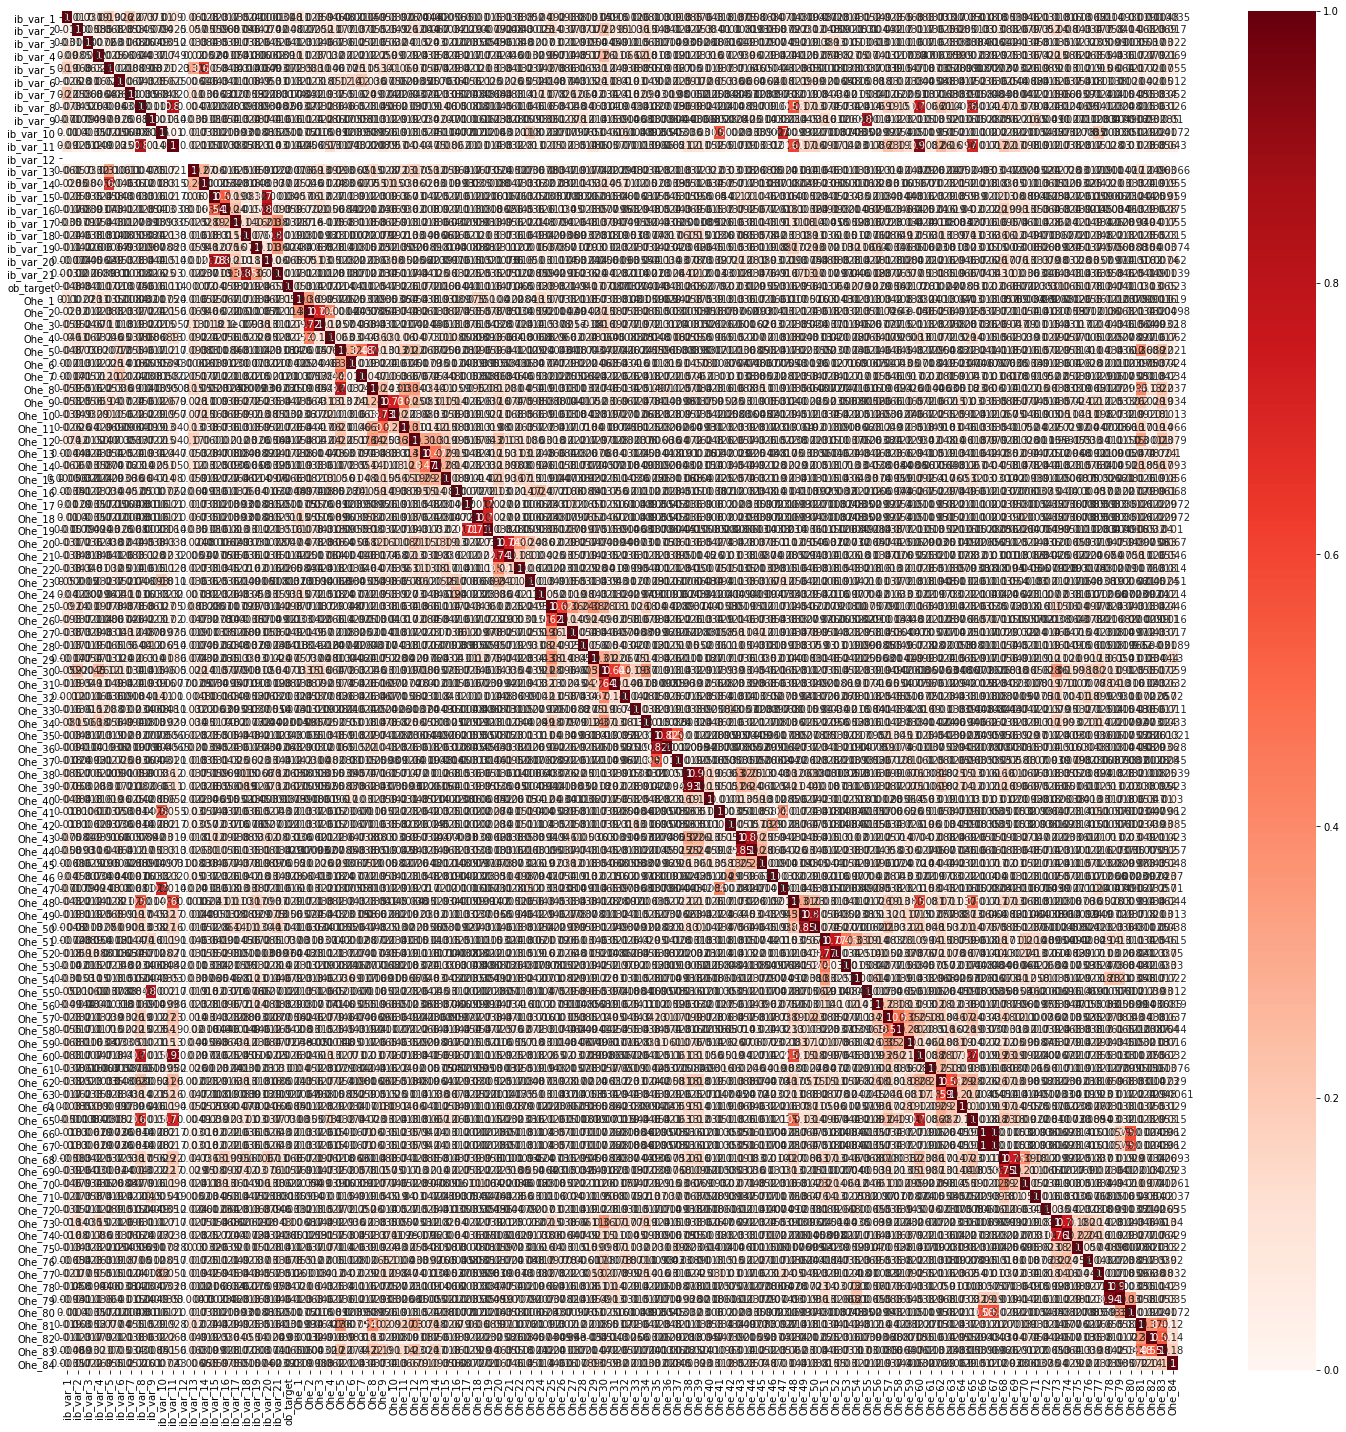

In [37]:
# Checking for correlation of variables
import seaborn as sns
corr_matrix = df_var_imp.corr().abs()

plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix,annot = True,cmap=plt.cm.Reds)
plt.show()

# Variables of high correlance 20, 18->21, 8 -> 11+75+76, 5+14, 15+16 -> 20

In [38]:
df.loc[:,'ob_target'].value_counts()

0    776
1     88
Name: ob_target, dtype: int64

In [39]:
# For df
X_df = df_var_imp.drop('ob_target',axis=1)
y_df = df_var_imp.loc[:,'ob_target']

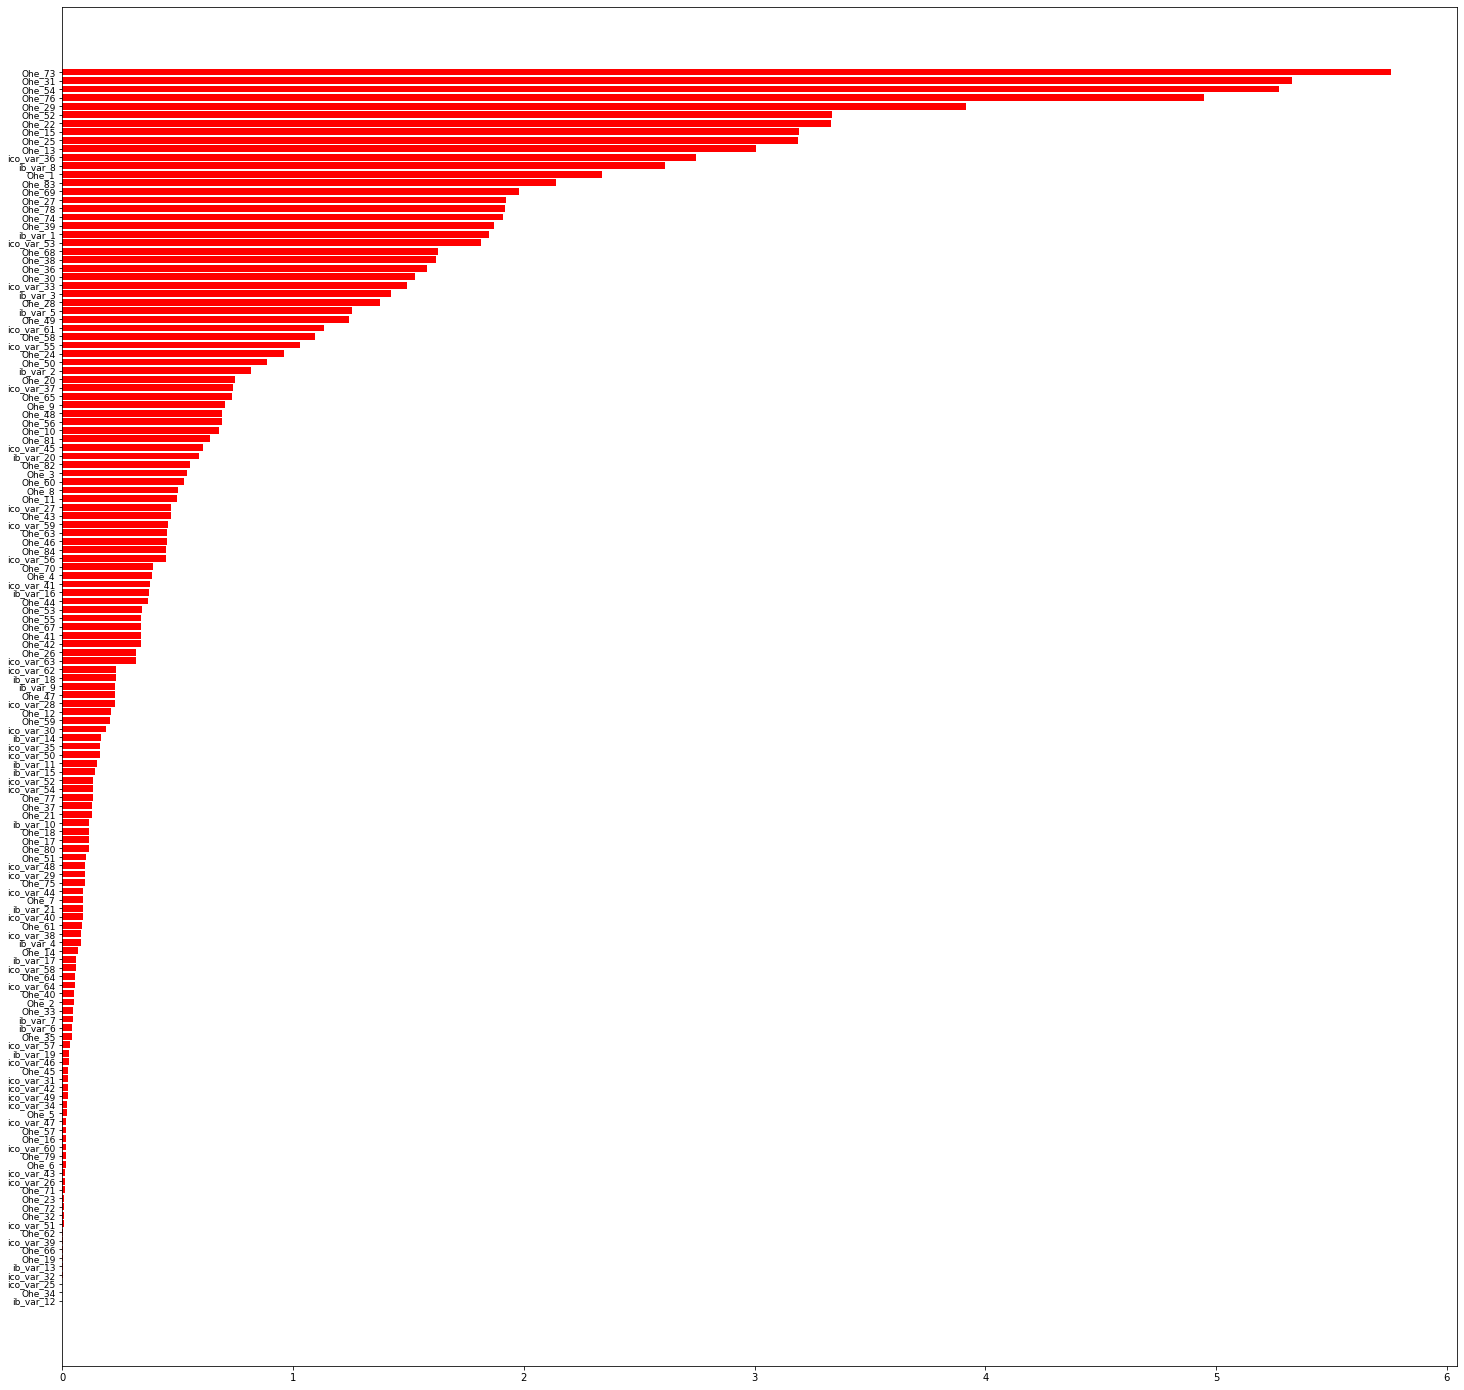

In [40]:
from sklearn.feature_selection import SelectKBest, chi2
           
chi2_selector = SelectKBest(score_func=chi2).fit(X_df,y_df)

# Get the indices sorted by most important to least important
indices = np.argsort(chi2_selector.scores_)[::-1]

chi2_features = []
for i in range(len(X_df.columns)):
    chi2_features.append(X_df.columns[indices[i]])

# Now plot
plt.figure(figsize=(25,25))
plt.yticks(rotation='horizontal',fontsize=9)
plt.barh(chi2_features, chi2_selector.scores_[indices[range(len(X_df.columns))]], color='r', align='center')
plt.gca().invert_yaxis()
plt.show()

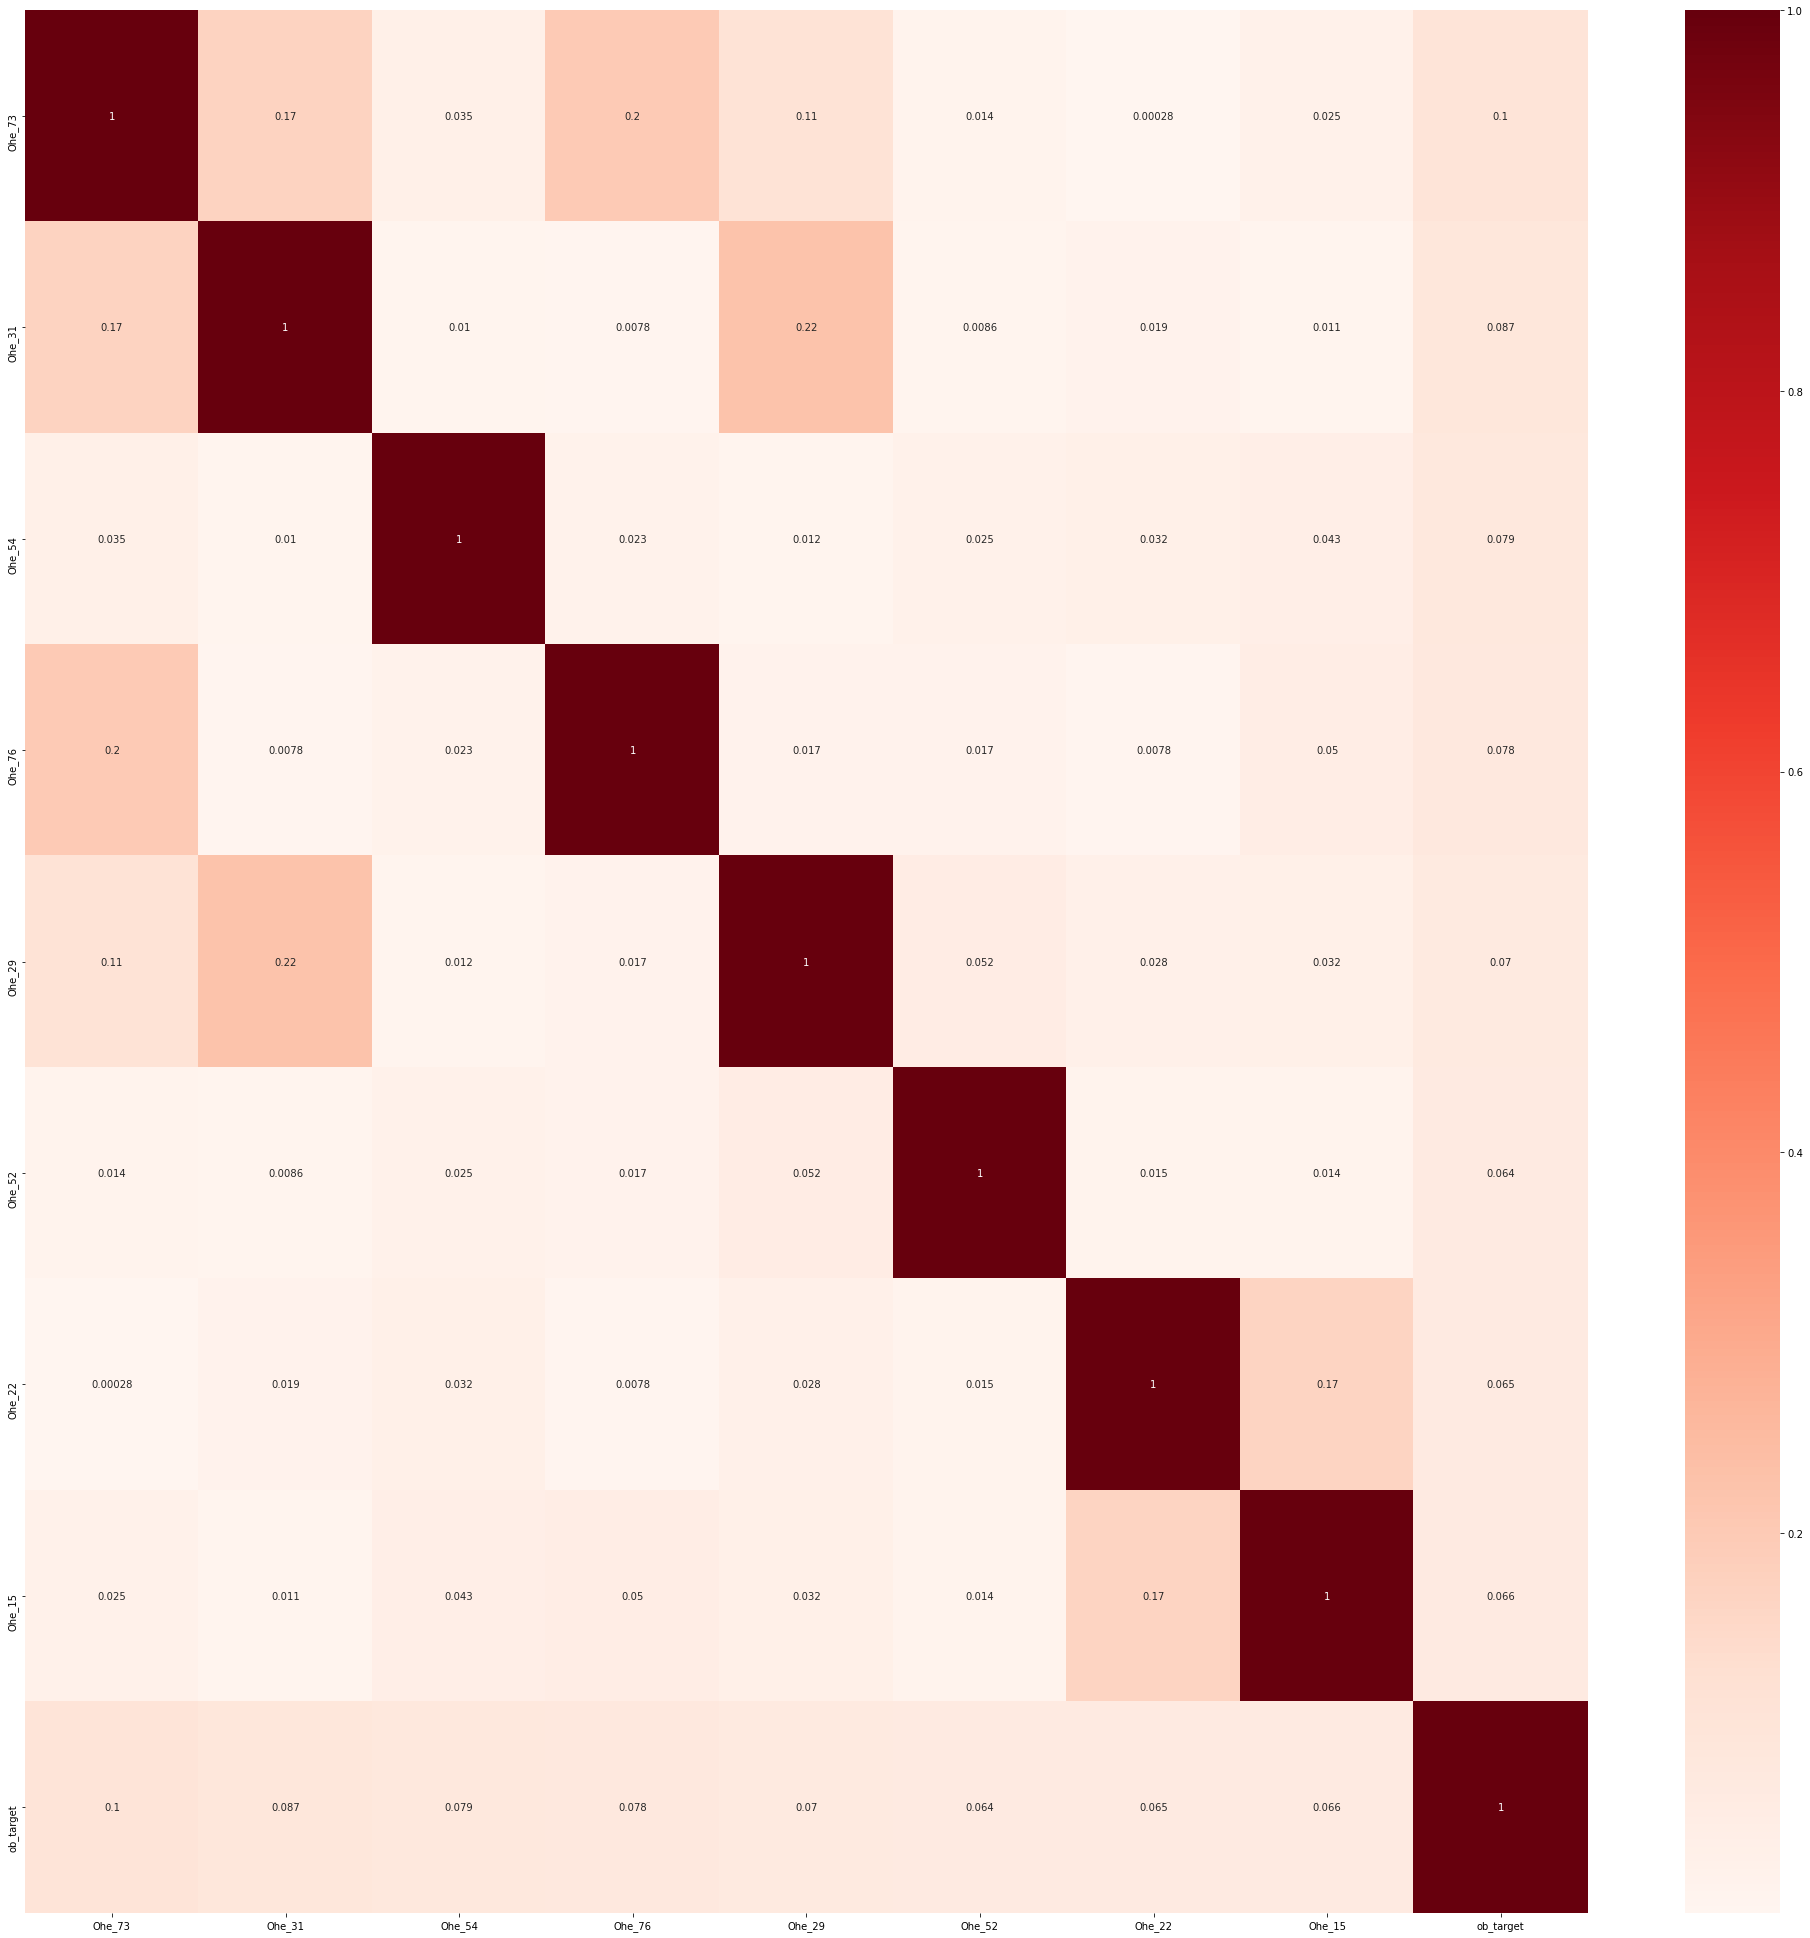

In [68]:
corr_matrix = pd.concat([df.loc[:,chi2_features[:8]].reset_index(drop=True), df['ob_target']], axis=1).corr().abs()

plt.figure(figsize=(35,35))
sns.heatmap(corr_matrix,annot = True,cmap=plt.cm.Reds)
plt.show()



## <u> Model development </u>

In [69]:
# For df
X_df = df.loc[:,chi2_features[:8]]
y_df = df.loc[:,'ob_target']

# For dfo
X_dfo = dfo.loc[:,chi2_features[:8]]

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42, stratify=y_df)

In [71]:
df['ob_target'].value_counts()

0    776
1     88
Name: ob_target, dtype: int64

In [72]:
y_train.value_counts()

0    621
1     70
Name: ob_target, dtype: int64

In [73]:
Fraud = y_df[y_df == 1]
Valid = y_df[y_df == 0]
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)


0.1134020618556701


In [47]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [74]:
# Selection of the model
print ("STEP 3: DEVELOPING THE MODEL...")
for metric in sklearn.metrics.SCORERS.keys():
    from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import confusion_matrix

        #clf = GradientBoostingClassifier(n_estimators=400, learning_rate=1.0, max_depth=1, random_state=0)
    clf_knn = KNeighborsClassifier()
    grid_values = {
        'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
    }
    try:
        grid_clf_pre = GridSearchCV(clf_knn, param_grid = grid_values, scoring = metric, cv = 6)
        fitted_model = grid_clf_pre.fit(X_train, y_train)
        pred_dev = fitted_model.predict(X_test)
        print('The scorer is: {} and with n={}'.format(metric,grid_clf_pre.best_params_))
        print(confusion_matrix(y_test,pred_dev))
        print()
    except:
        continue
#pred_oot  = fitted_model.predict_proba(Xo)[:,1]

STEP 3: DEVELOPING THE MODEL...
The scorer is: explained_variance and with n={'n_neighbors': 2}
[[155   0]
 [ 18   0]]

The scorer is: r2 and with n={'n_neighbors': 2}
[[155   0]
 [ 18   0]]

The scorer is: max_error and with n={'n_neighbors': 1}
[[110  45]
 [ 10   8]]

The scorer is: neg_median_absolute_error and with n={'n_neighbors': 1}
[[110  45]
 [ 10   8]]

The scorer is: neg_mean_absolute_error and with n={'n_neighbors': 2}
[[155   0]
 [ 18   0]]

The scorer is: neg_mean_squared_error and with n={'n_neighbors': 2}
[[155   0]
 [ 18   0]]

The scorer is: neg_mean_squared_log_error and with n={'n_neighbors': 2}
[[155   0]
 [ 18   0]]

The scorer is: neg_root_mean_squared_error and with n={'n_neighbors': 2}
[[155   0]
 [ 18   0]]

The scorer is: accuracy and with n={'n_neighbors': 2}
[[155   0]
 [ 18   0]]

The scorer is: roc_auc and with n={'n_neighbors': 19}
[[155   0]
 [ 18   0]]

The scorer is: roc_auc_ovr and with n={'n_neighbors': 19}
[[155   0]
 [ 18   0]]

The scorer is: roc

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaco

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaco

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaco

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaco

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwet

The scorer is: precision and with n={'n_neighbors': 1}
[[110  45]
 [ 10   8]]



/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugend

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugend

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugend

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugend

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugend

The scorer is: precision_macro and with n={'n_neighbors': 1}
[[110  45]
 [ 10   8]]

The scorer is: precision_micro and with n={'n_neighbors': 2}
[[155   0]
 [ 18   0]]



/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugend

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugend

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugend

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugend

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eugend

The scorer is: precision_weighted and with n={'n_neighbors': 1}
[[110  45]
 [ 10   8]]

The scorer is: recall and with n={'n_neighbors': 1}
[[110  45]
 [ 10   8]]

The scorer is: recall_macro and with n={'n_neighbors': 2}
[[155   0]
 [ 18   0]]

The scorer is: recall_micro and with n={'n_neighbors': 2}
[[155   0]
 [ 18   0]]

The scorer is: recall_weighted and with n={'n_neighbors': 2}
[[155   0]
 [ 18   0]]

The scorer is: f1 and with n={'n_neighbors': 1}
[[110  45]
 [ 10   8]]

The scorer is: f1_macro and with n={'n_neighbors': 1}
[[110  45]
 [ 10   8]]

The scorer is: f1_micro and with n={'n_neighbors': 2}
[[155   0]
 [ 18   0]]

The scorer is: f1_weighted and with n={'n_neighbors': 2}
[[155   0]
 [ 18   0]]

The scorer is: jaccard and with n={'n_neighbors': 1}
[[110  45]
 [ 10   8]]

The scorer is: jaccard_macro and with n={'n_neighbors': 2}
[[155   0]
 [ 18   0]]

The scorer is: jaccard_micro and with n={'n_neighbors': 2}
[[155   0]
 [ 18   0]]

The scorer is: jaccard_weighted and

In [85]:
# Setting knn with given parameters
clf_knn = KNeighborsClassifier()
grid_values = {
    'n_neighbors':[1,2,10,11,12,13,14,15]
}
grid_clf_pre = GridSearchCV(clf_knn, param_grid = grid_values, scoring = 'recall_micro', cv = 6)
fitted_model = grid_clf_pre.fit(X_train, y_train)

In [86]:
# Setting the classifier
clf_knn = grid_clf_pre.best_estimator_
clf_knn

KNeighborsClassifier(n_neighbors=2)

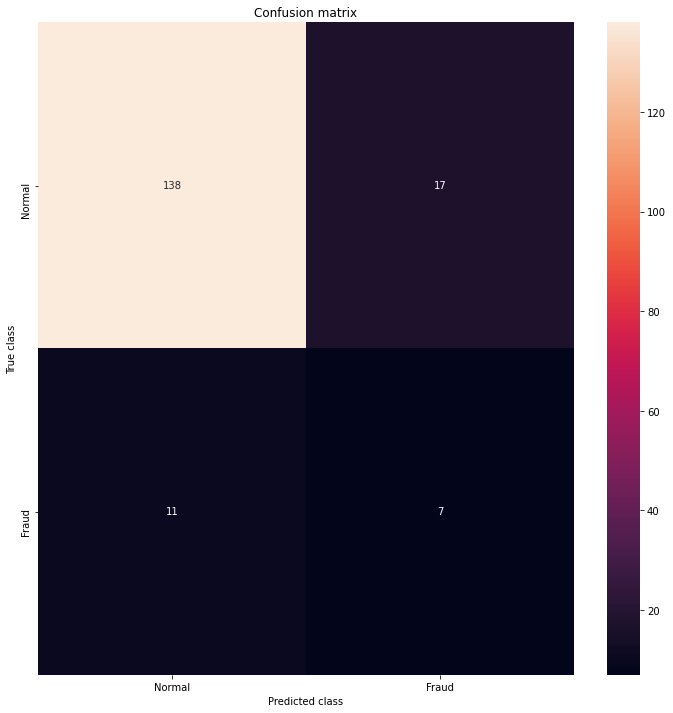

In [51]:
from sklearn.ensemble import IsolationForest
ifc=IsolationForest

iso_forest = IsolationForest(max_samples=len(X_train),contamination=outlier_fraction,bootstrap=True)
fitted_model = iso_forest.fit(X_train, y_train)
pred_dev = fitted_model.predict(X_test)
pred_dev[pred_dev == 1] = 0
pred_dev[pred_dev == -1] = 1
n_errors = (pred_dev != y_test).sum()

LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, pred_dev)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [152]:
# Creating a RF strong learner
from sklearn.ensemble import RandomForestClassifier,  VotingClassifier

clf_rf = RandomForestClassifier()
grid_values = {
    'max_depth':[1,2,3,7,8,9,10,11,12],
    'n_estimators':[300,350,400,500],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[1,2,3,4,5],
    'max_features':[None],
    'n_jobs':[-1]
}
grid_clf_rf = GridSearchCV(clf_rf, param_grid = grid_values, scoring = 'recall_micro', cv = 6)
fitted_model = grid_clf_rf.fit(X_train, y_train)
pred_dev = fitted_model.predict(X_test)
rf = grid_clf_rf.best_estimator_
print(confusion_matrix(y_test,pred_dev))
print()
print(rf)

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for 

[[155   0]
 [ 18   0]]

RandomForestClassifier(max_depth=1, max_features=None, n_estimators=300,
                       n_jobs=-1)


In [151]:
rf

RandomForestClassifier(max_depth=1, max_features=None, n_estimators=300,
                       n_jobs=-1)

In [ ]:
from sklearn.linear_model import SGDClassifier

clf_sgd = SGDClassifier(loss="log", penalty="l2")

grid_values = {
    'alpha':[10 ** x for x in range(-5, 0)],
    'max_iter':[100 * (x+1) for x in range(4,10)]
}
try:
    
grid_clf_sgd = GridSearchCV(clf_sgd, param_grid = grid_values, scoring = 'recall_micro', cv = 6)
fitted_model = grid_clf_sgd.fit(X_train, y_train)
pred_dev = fitted_model.predict(X_test)
print('The scorer is: {} and with n={}'.format(metric,grid_clf_sgd.best_params_))
print()
print(confusion_matrix(y_test,pred_dev))
print()
print('----------------------------------')

In [115]:
from sklearn.linear_model import SGDClassifier
clf_sgd = SGDClassifier(alpha = 1e-05, max_iter = 900, loss="log", penalty="l2", class_weight='balanced')

In [59]:
from sklearn.linear_model import LogisticRegression

logr_clf = LogisticRegression()
grid_values = {
    'C':[0.001,0.0001,0.00001,0.01],
    'solver':['lbfgs','sag','saga'],
    'penalty': ['l1', 'l2'],
    'class_weight' :['balanced'],
    'n_jobs':[-1]
}
grid_clf_pre_log = GridSearchCV(logr_clf, param_grid = grid_values, scoring = 'recall_micro', cv=6)
fitted_model_log = grid_clf_pre_log.fit(X_train, y_train)
pred_dev_log = fitted_model_log.predict(X_test)
confusion_matrix(y_test,pred_dev_log)

/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/eugendanielwettstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/eugendanielwettstein/opt/anaconda3

array([[155,   0],
       [ 18,   0]])

In [ ]:
grid_clf_pre_log.best_estimator_

In [140]:
# Putting all the previous models together
est_Ensemble = VotingClassifier(estimators=[('KNN',clf_knn),('RF',rf),('SGD',clf_sgd)],voting='soft')
fitted_model_ens = est_Ensemble.fit(X_train, y_train)
pred_dev_ens = fitted_model_ens.predict(X_test)
confusion_matrix(y_test,pred_dev_ens)

array([[153,   2],
       [ 16,   2]])

In [145]:
pred_dev  = fitted_model_ens.predict_proba(X_df)[:,1]
pred_oot  = fitted_model_ens.predict_proba(X_dfo)[:,1]

In [146]:
print ("STEP 4: ASSESSING THE MODEL...")
# CALCULATING GINI PERFORMANCE ON DEVELOPMENT SAMPLE
from sklearn.metrics import roc_auc_score
gini_score = 2*roc_auc_score(y_df, pred_dev)-1
print ("GINI DEVELOPMENT=", gini_score)

def KS(b,a):  
    """Function that received two parameters; first: a binary variable representing 0=good and 1=bad, 
    and then a second variable with the prediction of the first variable, the second variable can be continuous, 
    integer or binary - continuous is better. Finally, the function returns the KS Statistics of the two lists."""
    try:
        tot_bads=1.0*sum(b)
        tot_goods=1.0*(len(b)-tot_bads)
        elements = zip(*[a,b])
        elements = sorted(elements,key= lambda x: x[0])
        elements_df = pd.DataFrame({'probability': b,'gbi': a})
        pivot_elements_df = pd.pivot_table(elements_df, values='probability', index=['gbi'], aggfunc=[sum,len]).fillna(0)
        max_ks = perc_goods = perc_bads = cum_perc_bads = cum_perc_goods = 0
        for i in range(len(pivot_elements_df)):
            perc_goods =  (pivot_elements_df.iloc[i]['len'] - pivot_elements_df.iloc[i]['sum']) / tot_goods
            perc_bads = pivot_elements_df.iloc[i]['sum']/ tot_bads
            cum_perc_goods += perc_goods
            cum_perc_bads += perc_bads
            A = cum_perc_bads-cum_perc_goods
            if abs(A['probability']) > max_ks:
                max_ks = abs(A['probability'])
    except:
        max_ks = 0
    return max_ks


KS_score = KS(y_df,pred_dev)
print ("KS DEVELOPMENT=", KS_score) 

STEP 4: ASSESSING THE MODEL...
GINI DEVELOPMENT= 0.24122832708528597
KS DEVELOPMENT= 0.20009372071227738


What is GINI and KS?
* watch this video for reference: https://youtu.be/MiBUBVUC8kE

In [147]:
print ("STEP 5: SUBMITTING THE RESULTS...")
import requests
from requests.auth import HTTPBasicAuth
dfo['pred'] = pred_oot
dfo_tosend = dfo[list(['id','pred'])]

i=1
filename = "student_sub"+str(i)+".csv"
dfo_tosend.to_csv(filename, sep=',')

url = 'http://mfalonso.pythonanywhere.com/api/v1.0/uploadpredictions'



STEP 5: SUBMITTING THE RESULTS...


To compete in this challenge, please create an user at my teaching website: http://mfalonso.pythonanywhere.com
and replace below where it says:
* my_user_name_goes_here
* my_password_goes_here

In [148]:
files = {'file': (filename, open(filename, 'rb'))}
rsub = requests.post(url, files=files, auth=HTTPBasicAuth('eugen.wettstein', 'CaSaBlAnCa11'))

resp_str = str(rsub.text)
print ("RESULT SUBMISSION: ", resp_str)

RESULT SUBMISSION:  KS2 = 0.159256323996; GINI = 0.181271314892; GRADE = 3.774
